In [1]:
#라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#시각화 도구 Setting
plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [3]:
raw = pd.read_csv("data/edit/dlvr_data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
raw.head()

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,...,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME
0,3486930,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,\N,4128552000,경기도,...,\N,4128552000,D0005898,2900,21900,1,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01
1,3486932,2019-12-01,1,치킨,경기도,의정부시,의정부동,\N,4115051000,경기도,...,\N,4115062000,D0000864,3500,19500,2,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32
2,3486933,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,\N,4128559000,경기도,...,\N,4128556000,D0001526,3500,18000,2,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57
3,3486934,2019-12-01,1,치킨,경기도,의정부시,금오동,\N,4115058000,경기도,...,\N,4115058000,D0000986,3500,18000,3,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22
4,3486940,2019-12-01,1,아시안/양식,경기도,광명시,광명동,\N,4121055000,경기도,...,\N,4121060000,D0003991,3300,19000,2,2019-12-01 19:08:19,2019-12-01 19:37:13,2019-12-01 19:58:04,2019-12-01 19:58:06


In [5]:
raw.columns

Index(['SN', 'PROCESS_DT', 'DLVR_REQUST_STTUS_VALUE', 'DLVR_STORE_INDUTY_NM',
       'DLVR_STORE_BRTC_NM', 'DLVR_STORE_SIGNGU_NM', 'DLVR_STORE_LEGALDONG_NM',
       'DLVR_STORE_LI_NM', 'DLVR_STORE_ADSTRD_CODE', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'DLVR_DSTN_LEGALDONG_NM', 'DLVR_DSTN_LI_NM',
       'DLVR_DSTN_ADSTRD_CODE', 'DLVR_MAN_ID', 'DLVR_AMOUNT', 'GOODS_AMOUNT',
       'SETLE_KND_VALUE', 'DLVR_RCEPT_TIME', 'DLVR_CARALC_TIME',
       'DLVR_RECPT_TIME', 'DLVR_COMPT_TIME'],
      dtype='object')

In [6]:
raw["DLVR_MAN_ID"].unique()

array(['D0005898', 'D0000864', 'D0001526', ..., 'D0010412', 'D0010413',
       'D0010428'], dtype=object)

행정동별 동일배달시간 구간 쏠림현상은 있는지 없는지

1. 요일 컬럼
2. 시간대 컬럼
3. 배달 소요시간 컬럼


경기도 지역 지도 보면서 인접지역을 묶어서 배달 라이더 배치를 몇군데 할건지
배달 건수와 배달 걸리는시간을 고려해서 이지역에는 몇명배치하는게 적당할까? 배달한건당 몇분걸리니까 이런분석

In [7]:
raw.shape

(3173016, 22)

In [8]:
raw["SN"].nunique()

3150476

In [9]:
index = raw["SN"].value_counts().reset_index()
index[index["SN"] == 2]

,index,SN
0,6610618,2
1,6640491,2
2,6642531,2
3,6618682,2
4,6616151,2
...,...,...
22535,6626297,2
22536,6647315,2
22537,6624248,2
22538,6608723,2


In [10]:
raw2 = raw.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [11]:
raw2.shape

(3173016, 22)

In [12]:
raw2["SN"].nunique()

3150476

In [13]:
raw[raw["SN"] == 6610618]

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,...,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME
1422904,6610618,2020-03-01,1,돈까스/일식,경기도,의정부시,민락동,\N,4115057800,경기도,...,\N,4115057800,D0007520,3500,35500,2,2020-03-01 12:58:12,2020-03-01 12:58:39,2020-03-01 13:13:34,2020-03-01 13:17:53
2624011,6610618,2020-03-01,1,돈까스/일식,경기도,의정부시,민락동,\N,4115057800,경기도,...,\N,4115057800,D0007520,3500,35500,2,2020-03-01 12:58,2020-03-01 12:58,2020-03-01 13:13,2020-03-01 13:17


In [14]:
raw['DLVR_RCEPT_TIME'] = pd.to_datetime(raw['DLVR_RCEPT_TIME'])
raw['DLVR_COMPT_TIME'] = pd.to_datetime(raw['DLVR_COMPT_TIME'])


In [15]:
raw["DLVR_RCEPT_TIME"] = raw["DLVR_RCEPT_TIME"].dt.strftime("%Y-%m-%d %H:%M")
raw["DLVR_COMPT_TIME"] = raw["DLVR_COMPT_TIME"].dt.strftime("%Y-%m-%d %H:%M")


In [16]:
raw.columns

Index(['SN', 'PROCESS_DT', 'DLVR_REQUST_STTUS_VALUE', 'DLVR_STORE_INDUTY_NM',
       'DLVR_STORE_BRTC_NM', 'DLVR_STORE_SIGNGU_NM', 'DLVR_STORE_LEGALDONG_NM',
       'DLVR_STORE_LI_NM', 'DLVR_STORE_ADSTRD_CODE', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'DLVR_DSTN_LEGALDONG_NM', 'DLVR_DSTN_LI_NM',
       'DLVR_DSTN_ADSTRD_CODE', 'DLVR_MAN_ID', 'DLVR_AMOUNT', 'GOODS_AMOUNT',
       'SETLE_KND_VALUE', 'DLVR_RCEPT_TIME', 'DLVR_CARALC_TIME',
       'DLVR_RECPT_TIME', 'DLVR_COMPT_TIME'],
      dtype='object')

In [17]:
raw = raw[['SN', 'PROCESS_DT', 'DLVR_REQUST_STTUS_VALUE', 'DLVR_STORE_INDUTY_NM', 'DLVR_STORE_BRTC_NM', 'DLVR_STORE_SIGNGU_NM', 'DLVR_STORE_LEGALDONG_NM',
       'DLVR_STORE_LI_NM', 'DLVR_STORE_ADSTRD_CODE', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'DLVR_DSTN_LEGALDONG_NM', 'DLVR_DSTN_LI_NM',
       'DLVR_DSTN_ADSTRD_CODE', 'DLVR_MAN_ID', 'DLVR_AMOUNT', 'GOODS_AMOUNT',
       'SETLE_KND_VALUE', 'DLVR_RCEPT_TIME','DLVR_COMPT_TIME']]

In [18]:
raw2 = raw.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [19]:
raw2["SN"].nunique()

3150476

In [20]:
raw2.shape

(3150476, 20)

In [21]:
raw2.head()

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_COMPT_TIME
0,3486930,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,\N,4128552000,경기도,고양시 일산동구,중산동,\N,4128552000,D0005898,2900,21900,1,2019-12-01 21:58,2019-12-01 22:26
1,3486932,2019-12-01,1,치킨,경기도,의정부시,의정부동,\N,4115051000,경기도,의정부시,녹양동,\N,4115062000,D0000864,3500,19500,2,2019-12-01 22:20,2019-12-01 22:58
2,3486933,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,\N,4128559000,경기도,고양시 일산동구,마두동,\N,4128556000,D0001526,3500,18000,2,2019-12-01 21:40,2019-12-01 22:17
3,3486934,2019-12-01,1,치킨,경기도,의정부시,금오동,\N,4115058000,경기도,의정부시,금오동,\N,4115058000,D0000986,3500,18000,3,2019-12-01 19:44,2019-12-01 20:00
4,3486940,2019-12-01,1,아시안/양식,경기도,광명시,광명동,\N,4121055000,경기도,광명시,철산동,\N,4121060000,D0003991,3300,19000,2,2019-12-01 19:08,2019-12-01 19:58


In [23]:
raw2['DLVR_RCEPT_TIME'] = pd.to_datetime(raw2['DLVR_RCEPT_TIME'])
raw2['DLVR_COMPT_TIME'] = pd.to_datetime(raw2['DLVR_COMPT_TIME'])

<ipython-input-23-d4f4618b2d37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2['DLVR_RCEPT_TIME'] = pd.to_datetime(raw2['DLVR_RCEPT_TIME'])
<ipython-input-23-d4f4618b2d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2['DLVR_COMPT_TIME'] = pd.to_datetime(raw2['DLVR_COMPT_TIME'])


In [24]:
raw2["DLVR_TIME"] = raw2["DLVR_COMPT_TIME"] - raw2["DLVR_RCEPT_TIME"]

<ipython-input-24-1cb26da86657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2["DLVR_TIME"] = raw2["DLVR_COMPT_TIME"] - raw2["DLVR_RCEPT_TIME"]


In [25]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3150476 entries, 0 to 3173015
Data columns (total 21 columns):
 #   Column                   Dtype          
---  ------                   -----          
 0   SN                       int64          
 1   PROCESS_DT               object         
 2   DLVR_REQUST_STTUS_VALUE  int64          
 3   DLVR_STORE_INDUTY_NM     object         
 4   DLVR_STORE_BRTC_NM       object         
 5   DLVR_STORE_SIGNGU_NM     object         
 6   DLVR_STORE_LEGALDONG_NM  object         
 7   DLVR_STORE_LI_NM         object         
 8   DLVR_STORE_ADSTRD_CODE   int64          
 9   DLVR_DSTN_BRTC_NM        object         
 10  DLVR_DSTN_SIGNGU_NM      object         
 11  DLVR_DSTN_LEGALDONG_NM   object         
 12  DLVR_DSTN_LI_NM          object         
 13  DLVR_DSTN_ADSTRD_CODE    object         
 14  DLVR_MAN_ID              object         
 15  DLVR_AMOUNT              int64          
 16  GOODS_AMOUNT             int64          
 17  SETLE_KN

In [26]:
raw2.head()

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,...,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_COMPT_TIME,DLVR_TIME
0,3486930,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,\N,4128552000,경기도,...,중산동,\N,4128552000,D0005898,2900,21900,1,2019-12-01 21:58:00,2019-12-01 22:26:00,0 days 00:28:00
1,3486932,2019-12-01,1,치킨,경기도,의정부시,의정부동,\N,4115051000,경기도,...,녹양동,\N,4115062000,D0000864,3500,19500,2,2019-12-01 22:20:00,2019-12-01 22:58:00,0 days 00:38:00
2,3486933,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,\N,4128559000,경기도,...,마두동,\N,4128556000,D0001526,3500,18000,2,2019-12-01 21:40:00,2019-12-01 22:17:00,0 days 00:37:00
3,3486934,2019-12-01,1,치킨,경기도,의정부시,금오동,\N,4115058000,경기도,...,금오동,\N,4115058000,D0000986,3500,18000,3,2019-12-01 19:44:00,2019-12-01 20:00:00,0 days 00:16:00
4,3486940,2019-12-01,1,아시안/양식,경기도,광명시,광명동,\N,4121055000,경기도,...,철산동,\N,4121060000,D0003991,3300,19000,2,2019-12-01 19:08:00,2019-12-01 19:58:00,0 days 00:50:00


In [28]:
raw2["DLVR_TIME_int"] = pd.to_numeric(raw2["DLVR_TIME"]/60/1000000000)

<ipython-input-28-a3122c199d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2["DLVR_TIME_int"] = pd.to_numeric(raw2["DLVR_TIME"]/60/1000000000)


In [29]:
raw2.head()

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,...,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_COMPT_TIME,DLVR_TIME,DLVR_TIME_int
0,3486930,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,\N,4128552000,경기도,...,\N,4128552000,D0005898,2900,21900,1,2019-12-01 21:58:00,2019-12-01 22:26:00,0 days 00:28:00,28
1,3486932,2019-12-01,1,치킨,경기도,의정부시,의정부동,\N,4115051000,경기도,...,\N,4115062000,D0000864,3500,19500,2,2019-12-01 22:20:00,2019-12-01 22:58:00,0 days 00:38:00,38
2,3486933,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,\N,4128559000,경기도,...,\N,4128556000,D0001526,3500,18000,2,2019-12-01 21:40:00,2019-12-01 22:17:00,0 days 00:37:00,37
3,3486934,2019-12-01,1,치킨,경기도,의정부시,금오동,\N,4115058000,경기도,...,\N,4115058000,D0000986,3500,18000,3,2019-12-01 19:44:00,2019-12-01 20:00:00,0 days 00:16:00,16
4,3486940,2019-12-01,1,아시안/양식,경기도,광명시,광명동,\N,4121055000,경기도,...,\N,4121060000,D0003991,3300,19000,2,2019-12-01 19:08:00,2019-12-01 19:58:00,0 days 00:50:00,50


<AxesSubplot:xlabel='DLVR_STORE_INDUTY_NM'>

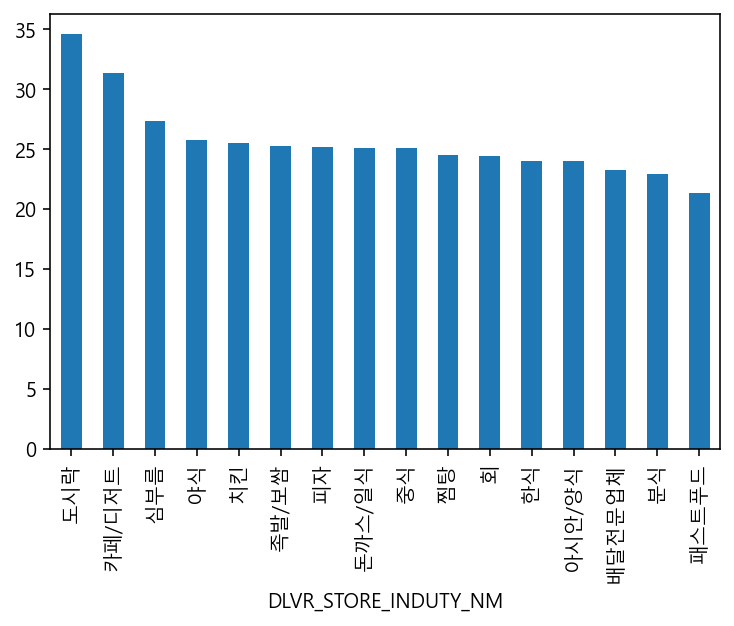

In [32]:
raw2.groupby(["DLVR_STORE_INDUTY_NM"])["DLVR_TIME_int"].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='DLVR_STORE_LEGALDONG_NM'>

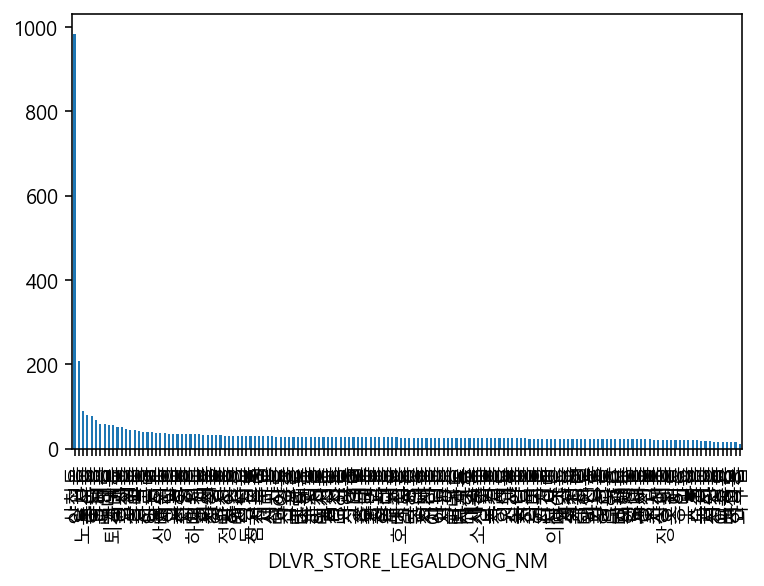

In [37]:
raw2.groupby(["DLVR_STORE_LEGALDONG_NM"])["DLVR_TIME_int"].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='DLVR_STORE_SIGNGU_NM', ylabel='DLVR_TIME_int'>

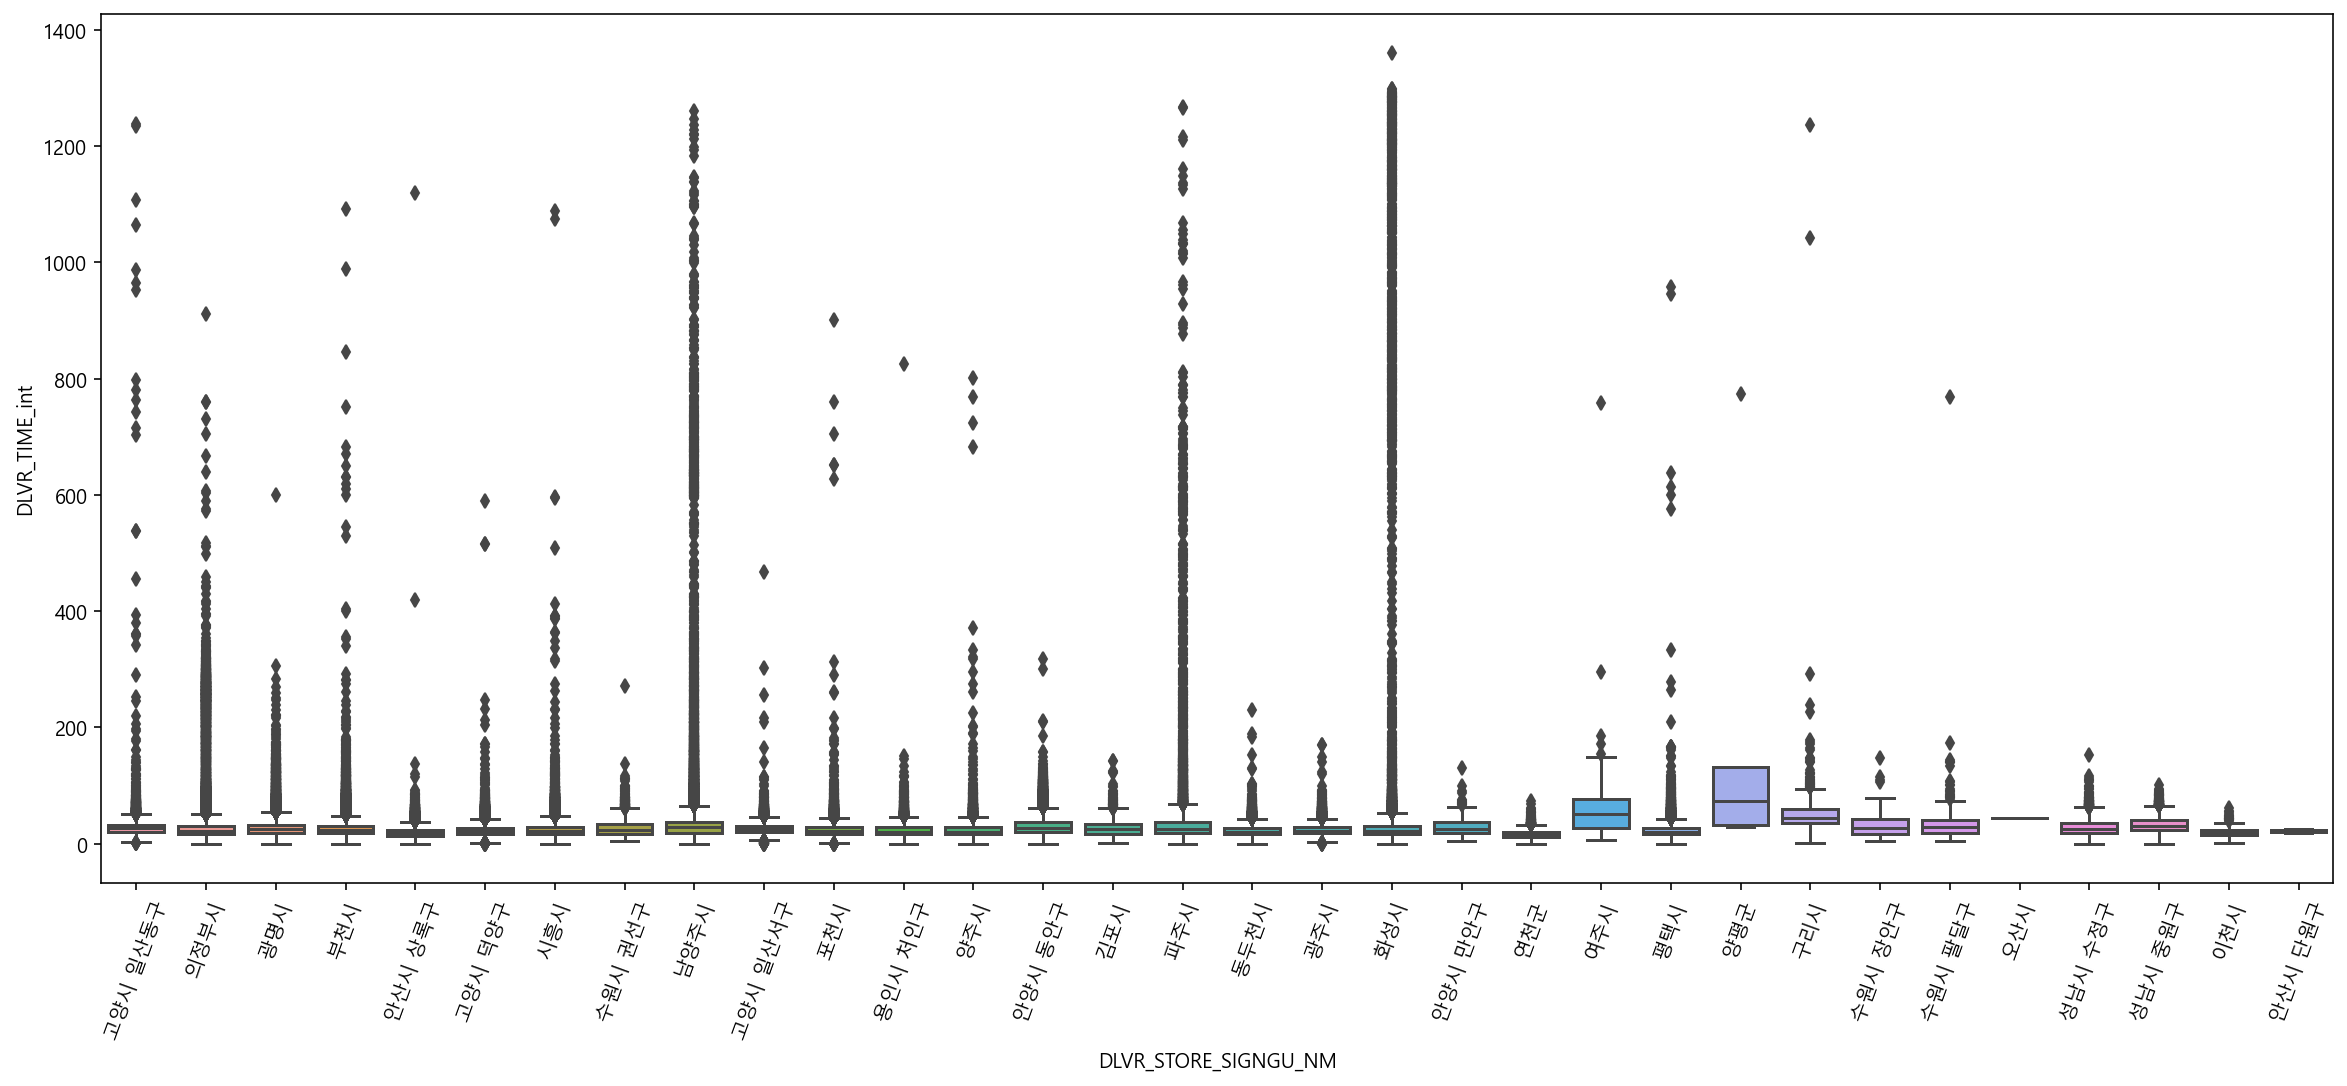

In [41]:
#업종을 x축으로 시각화
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 70 )
sns.boxplot(data=raw2, x="DLVR_STORE_SIGNGU_NM", y="DLVR_TIME_int")

In [42]:
raw2["DLVR_STORE_BRTC_NM"].unique()

array(['경기도'], dtype=object)

In [45]:
#평균 배달시간
raw2["DLVR_TIME_int"].mean()

25.089813412322457

In [52]:
pd.options.display.float_format = '{:.5f}'.format

raw2["DLVR_TIME_int"].describe()

count   3150476.00000
mean         25.08981
std          22.98647
min           0.00000
25%          17.00000
50%          23.00000
75%          30.00000
max        1360.00000
Name: DLVR_TIME_int, dtype: float64

<AxesSubplot:xlabel='DLVR_STORE_BRTC_NM', ylabel='DLVR_TIME_int'>

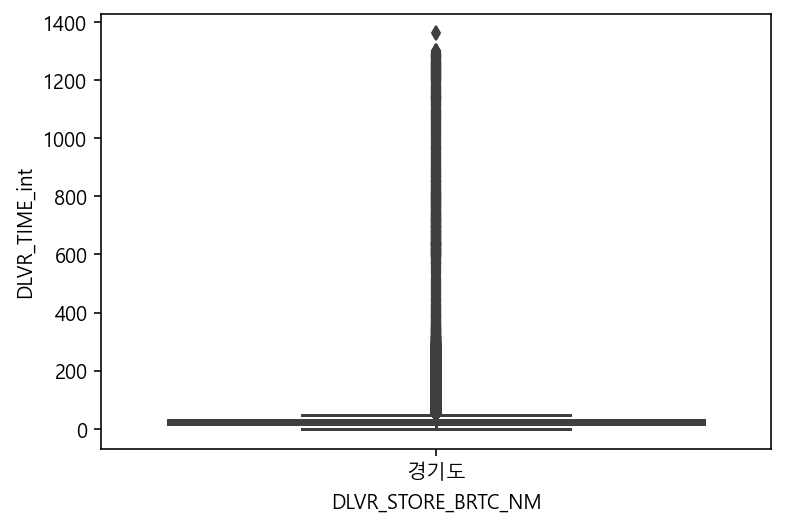

In [51]:
sns.boxplot(data=raw2, x="DLVR_STORE_BRTC_NM", y="DLVR_TIME_int")

In [55]:
#행정동별 평균 배달 소요시간 (시군구와 조합해서 동이름 중복없게)
raw2.groupby(["DLVR_STORE_LEGALDONG_NM"])["DLVR_TIME_int"].mean().sort_values()

DLVR_STORE_LEGALDONG_NM
와부읍     10.86074
전곡읍     15.74915
덕정동     15.90998
포곡읍     16.11026
이충동     16.18831
          ...   
목동동     76.19699
홍문동     79.42857
노온사동    89.40691
양평읍    208.00000
산척동    982.50000
Name: DLVR_TIME_int, Length: 156, dtype: float64

In [56]:
raw2.groupby(["DLVR_STORE_LEGALDONG_NM"])["SN"].count()

DLVR_STORE_LEGALDONG_NM
가능동      70324
갈매동        962
감정동       1567
강천면          2
계수동        247
         ...  
호매실동      1537
호원동      92729
홍문동         49
화서동       1176
화정동     134971
Name: SN, Length: 156, dtype: int64

#라이더 붐비는 지역 확인하기
#라이더 부족한 지역 확인하기

- 총배달건수 * 25 => 이상적 배달시간
- 실제 배달시간 - 이상적 배달시간
- 차액에 따른 라이더 인원 배치 조정



In [62]:
raw2["SN"].count()*25

78761900

In [63]:
raw2["DLVR_TIME_int"].sum()

79044855

In [64]:
79044855-78761900

282955

- 모든 '동'의 배달시간을 25분으로 맞출 경우, 배달 총 소요시간 282,955분만큼 줄어듬

In [81]:
raw2.groupby(["DLVR_STORE_LEGALDONG_NM"])["DLVR_TIME_int"].agg(["count","sum"]).reset_index()

,DLVR_STORE_LEGALDONG_NM,count,sum
0,가능동,70324,1586539
1,갈매동,962,50331
2,감정동,1567,42903
3,강천면,2,46
4,계수동,247,5742
...,...,...,...
151,호매실동,1537,40320
152,호원동,92729,1951715
153,홍문동,49,3892
154,화서동,1176,37436


In [82]:
df_dong = raw2.groupby(["DLVR_STORE_LEGALDONG_NM"])["DLVR_TIME_int"].agg(["count","sum"]).reset_index()

In [83]:
df_dong["DLVR_TIME_Goal"] = df_dong["count"]*25

In [85]:
df_dong["adjust"] = df_dong["DLVR_TIME_Goal"] - df_dong["sum"]

In [87]:
df_dong["rider"] = df_dong["adjust"]/25

In [89]:
df_dong["adjust"].sum()

-282955

In [90]:
raw2["SN"].count()

3150476

In [91]:
282955/3150476

0.0898134123224554

In [92]:
raw2.columns

Index(['SN', 'PROCESS_DT', 'DLVR_REQUST_STTUS_VALUE', 'DLVR_STORE_INDUTY_NM',
       'DLVR_STORE_BRTC_NM', 'DLVR_STORE_SIGNGU_NM', 'DLVR_STORE_LEGALDONG_NM',
       'DLVR_STORE_LI_NM', 'DLVR_STORE_ADSTRD_CODE', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'DLVR_DSTN_LEGALDONG_NM', 'DLVR_DSTN_LI_NM',
       'DLVR_DSTN_ADSTRD_CODE', 'DLVR_MAN_ID', 'DLVR_AMOUNT', 'GOODS_AMOUNT',
       'SETLE_KND_VALUE', 'DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME', 'DLVR_TIME',
       'DLVR_TIME_int'],
      dtype='object')

In [94]:
raw2["DLVR_ROUTE"] = raw2["DLVR_STORE_SIGNGU_NM"] +" to " + raw2["DLVR_DSTN_SIGNGU_NM"] 

<ipython-input-94-63612dd27424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2["DLVR_ROUTE"] = raw2["DLVR_STORE_SIGNGU_NM"] +" to " + raw2["DLVR_DSTN_SIGNGU_NM"]


In [106]:
df_route = raw2.groupby(["DLVR_ROUTE"])["DLVR_TIME_int"].mean().sort_values(ascending=False).reset_index()

In [110]:
df_route.describe()

,DLVR_TIME_int
count,125.00000
mean,32.11791
std,21.04740
min,2.00000
25%,23.34006
50%,28.17841
75%,33.00000
max,208.00000


<AxesSubplot:>

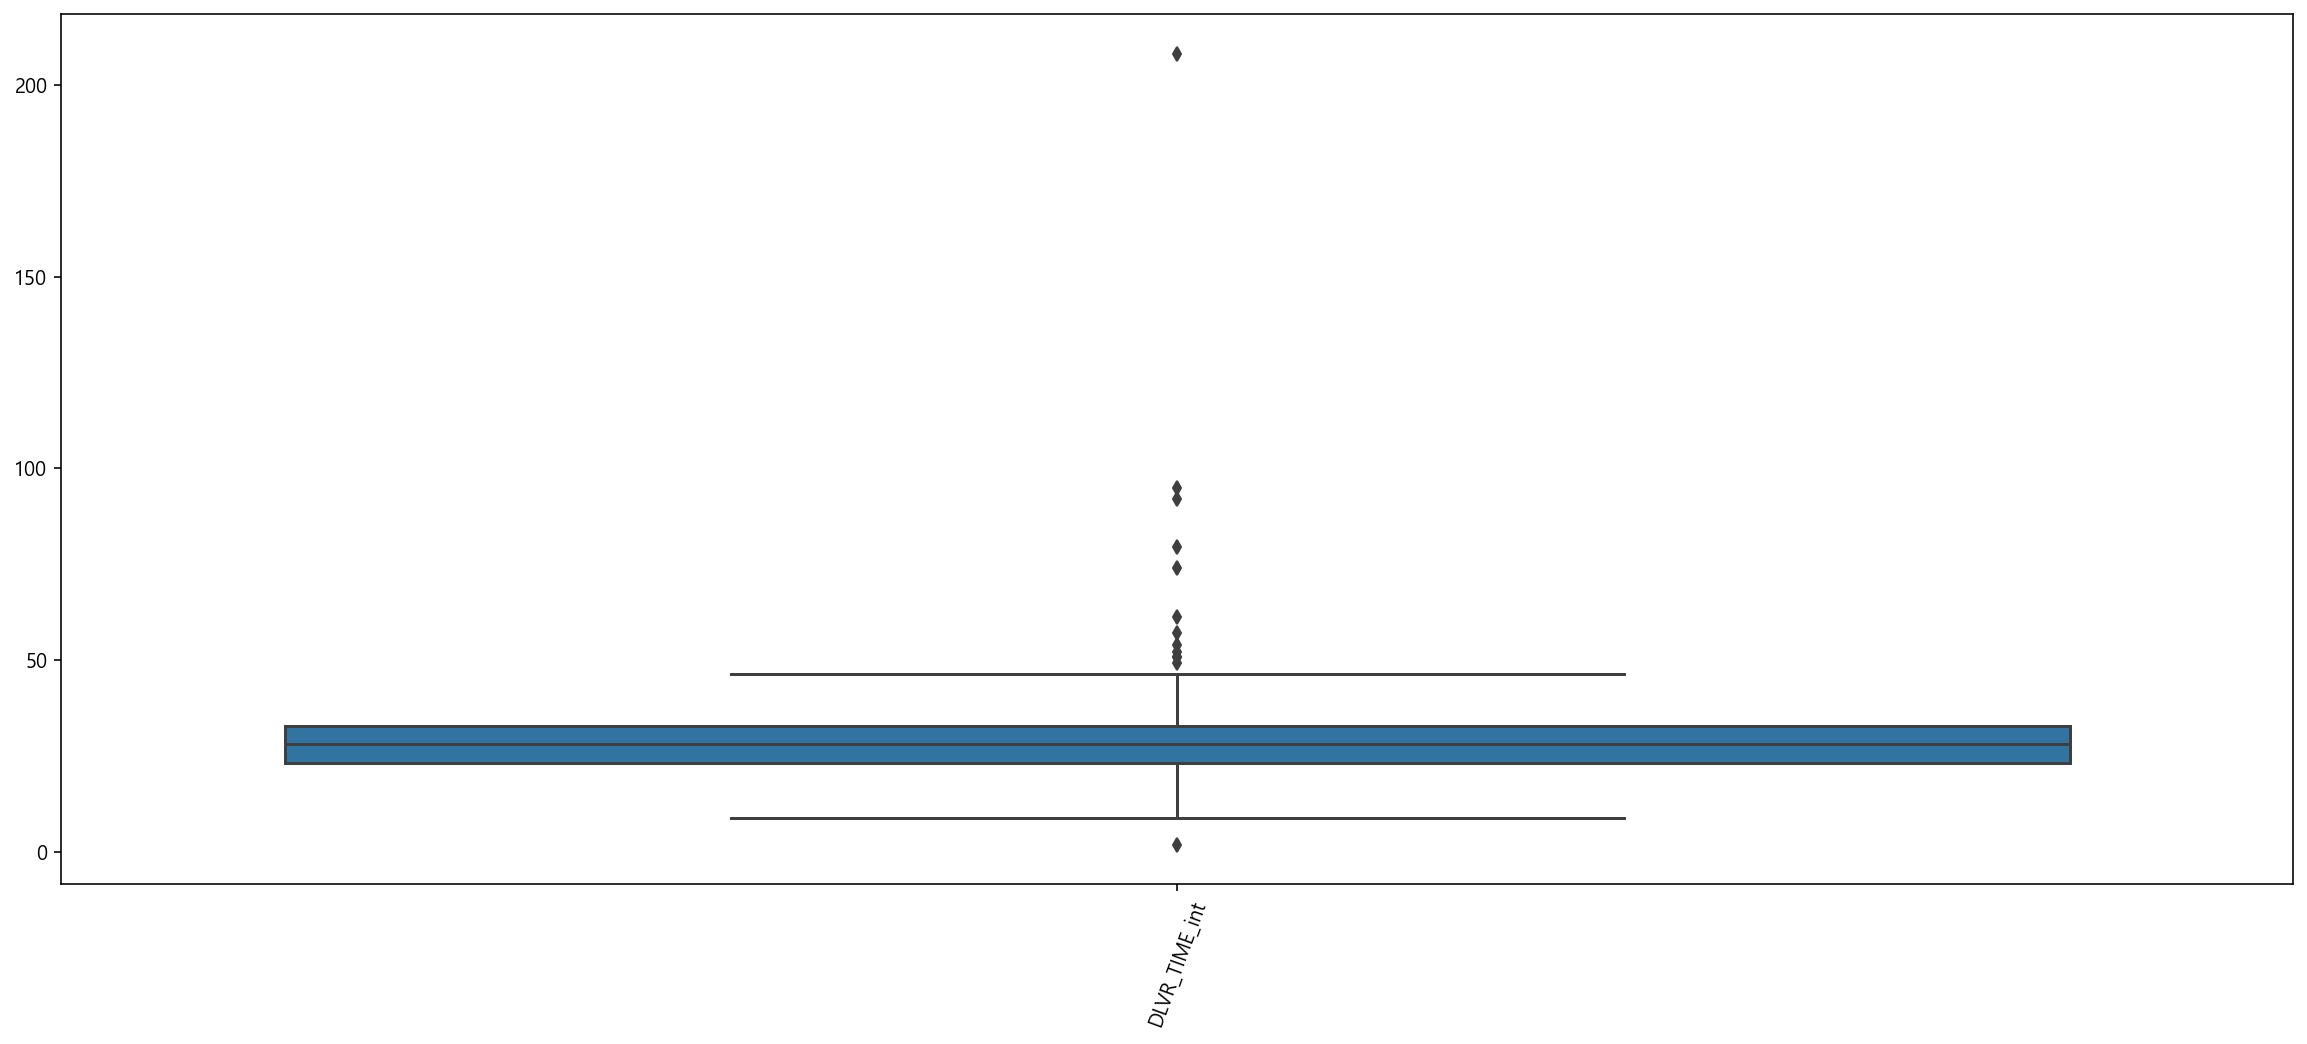

In [109]:
#업종을 x축으로 시각화
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 70 )
sns.boxplot(data=df_route)

In [118]:
# 33분이상 Route 배달 노선 없애기 -> 동단위로 다시보기
df_route[df_route["DLVR_TIME_int"] > 33]

,DLVR_ROUTE,DLVR_TIME_int
0,양평군 to 양평군,208.00000
1,구리시 to 남양주시,95.00000
2,고양시 일산동구 to 의정부시,92.00000
3,여주시 to 여주시,79.42857
4,안양시 동안구 to 과천시,74.00000
5,동두천시 to 의정부시,61.33333
6,성남시 중원구 to 하남시,57.25000
7,남양주시 to 구리시,54.00000
8,구리시 to 구리시,52.27471
9,성남시 수정구 to 부천시,51.00000


이 지역 루트를 없앨 경우 줄이는 배달 시간 확인하기


- 몰리는 지역 확인하기
- 부족한 지역 확인하기

In [129]:
raw2[~raw2["DLVR_STORE_LEGALDONG_NM"].str.contains("동")]

,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_BRTC_NM,...,DLVR_DSTN_ADSTRD_CODE,DLVR_MAN_ID,DLVR_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,DLVR_COMPT_TIME,DLVR_TIME,DLVR_TIME_int,DLVR_ROUTE
39,3487007,2019-12-01,1,야식,경기도,남양주시,진접읍,금곡리,4136025300,경기도,...,4136026200,D0005528,3500,27000,1,2019-12-01 21:29:00,2019-12-01 21:54:00,0 days 00:25:00,25,남양주시 to 남양주시
55,3487039,2019-12-01,1,야식,경기도,남양주시,진접읍,금곡리,4136025300,경기도,...,4136025300,D0005511,3500,32000,1,2019-12-01 20:40:00,2019-12-01 21:08:00,0 days 00:28:00,28,남양주시 to 남양주시
63,3487055,2019-12-01,1,족발/보쌈,경기도,남양주시,오남읍,양지리,4136026200,경기도,...,4136025300,D0005583,4000,38000,1,2019-12-01 18:35:00,2019-12-01 19:07:00,0 days 00:32:00,32,남양주시 to 남양주시
80,3487081,2019-12-01,1,치킨,경기도,용인시 처인구,남사면,아곡리,4146132000,경기도,...,4146132000,D0001969,3100,17500,2,2019-12-01 19:45:00,2019-12-01 20:17:00,0 days 00:32:00,32,용인시 처인구 to 용인시 처인구
98,3487130,2019-12-01,1,치킨,경기도,용인시 처인구,남사면,아곡리,4146132000,경기도,...,4146132000,D0001969,3100,13500,2,2019-12-01 22:59:00,2019-12-01 23:24:00,0 days 00:25:00,25,용인시 처인구 to 용인시 처인구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172978,7750473,2020-03-31,1,한식,경기도,평택시,안중읍,안중리,4122025300,경기도,...,4122025300,D0009635,3000,36000,2,2020-03-31 22:18:00,2020-03-31 22:41:00,0 days 00:23:00,23,평택시 to 평택시
3172981,7750484,2020-03-31,1,분식,경기도,남양주시,와부읍,도곡리,4136025000,경기도,...,4136025000,D0010443,3300,19000,1,2020-03-31 22:57:00,2020-03-31 23:06:00,0 days 00:09:00,9,남양주시 to 남양주시
3172985,7750491,2020-03-31,1,야식,경기도,용인시 처인구,남사면,아곡리,4146132000,경기도,...,4146132000,D0009054,3100,17000,2,2020-03-31 23:10:00,2020-03-31 23:22:00,0 days 00:12:00,12,용인시 처인구 to 용인시 처인구
3172997,7750515,2020-03-31,1,치킨,경기도,화성시,남양읍,남양리,4159026200,경기도,...,4159026200,D0006738,3000,0,2,2020-03-31 23:57:00,2020-04-01 00:10:00,0 days 00:13:00,13,화성시 to 화성시


In [130]:
raw2["DLVR_STORE_LEGALDONG_NM"].unique()

array(['중산동', '의정부동', '장항동', '금오동', '광명동', '괴안동', '송내동', '중동', '신곡동',
       '이동', '심곡동', '옥길동', '화정동', '가능동', '약대동', '본오동', '목감동', '호원동',
       '산현동', '민락동', '금곡동', '철산동', '풍동', '역곡동', '마두동', '진접읍', '행신동', '상동',
       '조남동', '삼정동', '일직동', '소하동', '오남읍', '일동', '성사동', '일산동', '신읍동',
       '남사면', '식사동', '백석동', '낙양동', '광사동', '옥정동', '소사본동', '녹양동', '주교동',
       '원미동', '정발산동', '사동', '탄현동', '평촌동', '정왕동', '호계동', '심곡본동', '풍무동',
       '사우동', '하안동', '용현동', '소사동', '주엽동', '와동동', '덕계동', '생연동', '태전동',
       '장암동', '별내동', '소흘읍', '남양읍', '덕이동', '계수동', '토당동', '동패동', '은행동',
       '지행동', '백석읍', '신천동', '장현동', '대야동', '춘의동', '야당동', '삼숭동', '석수동',
       '범박동', '호매실동', '전곡읍', '홍문동', '향남읍', '봉담읍', '퇴계원읍', '새솔동', '포곡읍',
       '안중읍', '문발동', '도당동', '덕정동', '논곡동', '능곡동', '관양동', '진건읍', '대화동',
       '내동', '목동동', '오산동', '감정동', '양평읍', '장곡동', '갈매동', '산척동', '월곶동',
       '중대동', '지산동', '서정동', '원흥동', '삼송동', '도내동', '선단동', '장지동', '오정동',
       '용두동', '양촌읍', '신장동', '와부읍', '천천동', '성석동', '동두천동', '상패동', '동산동',
       '화서동',

In [131]:
raw2["DLVR_STORE_LI_NM"].unique()

array(['\\N', '금곡리', '양지리', '아곡리', '오남리', '장현리', '송우리', '남양리', '복지리',
       '연평리', '전곡리', '완장리', '하길리', '와우리', '퇴계원리', '둔전리', '현화리', '용정리',
       '양근리', '부평리', '이동교리', '은대리', '안중리', '학운리', '덕소리', '도곡리', '일산리',
       '가채리', '걸은리', '팔야리', '학현리', '송담리', '옥길리', '덕우리', '기산리', '장호원리',
       '구읍리', '초가팔리', '상신리', '발안리'], dtype=object)

In [133]:
raw2["DLVR_STORE_LI_NM"] = raw2["DLVR_STORE_LI_NM"].str.replace(r'\\N','')

<ipython-input-133-ded42196da1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2["DLVR_STORE_LI_NM"] = raw2["DLVR_STORE_LI_NM"].str.replace(r'\\N','')


In [134]:
raw2["DLVR_STORE_LI_NM"].unique()

array(['', '금곡리', '양지리', '아곡리', '오남리', '장현리', '송우리', '남양리', '복지리', '연평리',
       '전곡리', '완장리', '하길리', '와우리', '퇴계원리', '둔전리', '현화리', '용정리', '양근리',
       '부평리', '이동교리', '은대리', '안중리', '학운리', '덕소리', '도곡리', '일산리', '가채리',
       '걸은리', '팔야리', '학현리', '송담리', '옥길리', '덕우리', '기산리', '장호원리', '구읍리',
       '초가팔리', '상신리', '발안리'], dtype=object)

인사이트 별개보 뽑아내기
0. 현재 루트로 지도그려보기(출발지 목적지 평균값으로)
1. 배달시간 75%이상 해당하는 루트 없애기(boxplot)
2. 라이더 많은지역 라이더 축소
3. 라이더 적은지역 라이더 강화
4. 해당루투의 평균값 차 확인
5. 최단거리 배치 지도 만들기(최종 조정 데이터로)